In [1]:
from analysis.musical import consonance_ordered_notes, consonance_probabilities

root_note = "C4"
consonance_ordered_notes(root_note)

['C5', 'G4', 'F4', 'E4', 'A4', 'G#4', 'D#4', 'F#4', 'A#4', 'D4', 'B4', 'C#4']

In [2]:
# scores = consonance_scores(min_value=0.01, max_value=0.99, dont_adjust=True)
scores = consonance_probabilities()
scores

[0.14666666666666667,
 0.13333333333333333,
 0.12,
 0.10666666666666667,
 0.10666666666666667,
 0.09333333333333334,
 0.08,
 0.06666666666666667,
 0.05333333333333334,
 0.05333333333333334,
 0.02666666666666667,
 0.013333333333333334]

In [23]:
from analysis.musical import consonance_scores
from analysis.spike_tensor import (
    generate_expectation,
    generate_snapshot,
    generate_spike_tensor,
)
import matplotlib.pyplot as plt
from cache import SNAPSHOT_DIR, get_spikes, save
import numpy as np
import os

def learn_snapshot(note, scores=None, min_value=-100, max_value=100):
    print(consonance_ordered_notes(note))
    scores = consonance_scores(min_value=min_value, max_value=max_value) if scores is None else scores
    spike_tensors = [
        generate_spike_tensor(get_spikes(note), tau=0.00001)
        for note in consonance_ordered_notes(note)
    ]
    print("Generated comparison tensors")
    expectation = generate_expectation(spike_tensors, scores)
    print("Generated Expectation")
    spikes = get_spikes(root_note)
    tensor = generate_spike_tensor(spikes, tau=0.00001)
    print("Generated Tensor")
    return generate_snapshot(tensor, expectation, snap_size=11)

def plot_snapshot(note, scores=None, min_value=-100, max_value=100, color=None):
    path = os.path.join(SNAPSHOT_DIR, f"{note}.npy")
    # sourcery skip: extract-method, inline-immediately-returned-variable
    try:
        snapshot = np.load(path)
    except FileNotFoundError: 
        snapshot = learn_snapshot(note, scores=scores, min_value=min_value, max_value=max_value)
        save(path, snapshot)
    if scores is not None:
        snapshot = learn_snapshot(note, scores=scores, min_value=min_value, max_value=max_value)
    print(snapshot)
    plt.plot(snapshot, color=color, label=note)
    # plt.show()

In [ ]:
from analysis.musical import consonance_scores
from analysis.spike_tensor import (
    generate_expectation,
    generate_snapshot,
    generate_spike_tensor,
)
import matplotlib.pyplot as plt
from cache import SNAPSHOT_DIR, get_spikes, save
import numpy as np
import os

def save_expectation(note, scores=None, min_value=-100, max_value=100):
    print(note)
    scores = consonance_scores(min_value=min_value, max_value=max_value) if scores is None else scores
    spike_tensors = [
        generate_spike_tensor(get_spikes(note), tau=0.00001)
        for note in consonance_ordered_notes(note)
    ]
    expectation = generate_expectation(spike_tensors, scores)
    save()
    
notes = [
    "C4",
    "C#4",
    "D4",
    "D#4",
    "E4",
    "F4",
    "F#4",
    "G4",
    "G#4",
    "A4",
    "A#4",
    "B4",
]

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np

# tension = [-np.sum(tensor * expectation) for tensor in spike_tensors]

# plt.plot(tension)

[-0.83, 0.63, -0.97, 0.73, -0.97, -0.21, -0.35, 0.63, 0.09, 0.51, 0.12, 0.37]
['C5', 'G4', 'F4', 'E4', 'A4', 'G#4', 'D#4', 'F#4', 'A#4', 'D4', 'B4', 'C#4']
Generated comparison tensors


/Users/prabnurbal/Documents/bez2018model_valence/analysis/spike_tensor.py:79: RuntimeWarning: invalid value encountered in divide
  expectation = np.where(count_nonzero != 0, np.divide(expectation, count_nonzero), expectation)


Generated Expectation
Generated Tensor
[0.00016418936524552517, 0.001768734909172088, -0.0036097784099739273, 0.0006904412255743465, 0.0024055091571113588, -0.0021731330225247267, 0.00018351441012020352, -0.004032184274423543, -0.0017893331590690988, -0.003060417501244175, -0.012801006253529328]


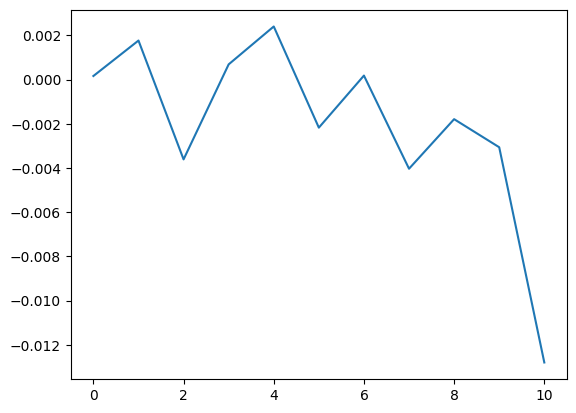

In [5]:
# RANDOM 0 -> 1

import random
import numpy as np

random_numbers = np.random.rand(12)

random_numbers = [-numb if random.random() <= 0.5 else numb for numb in random_numbers]
# random_numbers = [numb * 100 for numb in random_numbers]
print([round(numb, 2) for numb in random_numbers])
plot_snapshot("C4", scores=random_numbers)

[0.09, -0.26, 0.99, -0.65, 0.09, 0.22, 0.31, 0.19, 0.38, -0.85, -0.29, 0.64]
['C5', 'G4', 'F4', 'E4', 'A4', 'G#4', 'D#4', 'F#4', 'A#4', 'D4', 'B4', 'C#4']
Generated comparison tensors
Generated Expectation
Generated Tensor
[0.06984978516738234, 0.06915579501808382, 0.07336824848256882, 0.07017736383783205, 0.07015689660195329, 0.07159712006355548, 0.07748683955355991, 0.07020496376153486, 0.06971734463242622, 0.07141417653960455, 0.07795330660144374]


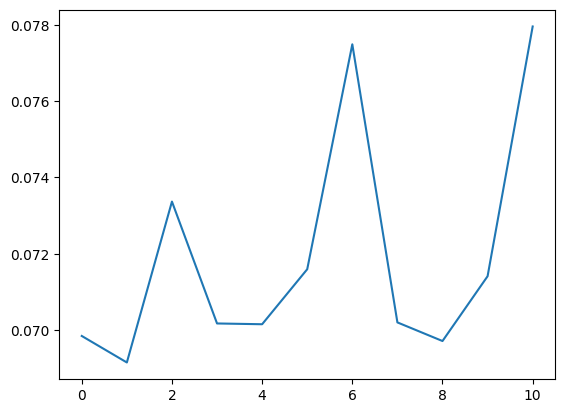

In [6]:
# RANDOM 0 -> 1

import random
import numpy as np

random_numbers = np.random.rand(12)

random_numbers = [-numb if random.random() <= 0.5 else numb for numb in random_numbers]
# random_numbers = [numb * 100 for numb in random_numbers]
print([round(numb, 2) for numb in random_numbers])
plot_snapshot("C4", scores=random_numbers)

[-0.07451242 -0.07641389 -0.07778951 -0.07407158 -0.07770919 -0.0728169
 -0.07591652 -0.07519379 -0.0797705  -0.07717966 -0.07108468]
[-5.31203063 -4.69642066 -4.16045133 -4.43303766 -4.38819381 -4.66719859
 -4.14609931 -4.47676458 -4.90213389 -5.05463216 -4.42620447]
[-4.52531783 -4.54563635 -4.38554061 -4.83931501 -4.31940491 -4.82474748
 -5.04988456 -4.9608237  -4.4704814  -4.81204911 -5.02160226]
[-4.96007726 -5.34232235 -5.23394218 -5.53830149 -5.92821794 -5.38373338
 -5.02767083 -6.31981597 -5.30434479 -6.09835597 -5.6642304 ]
[-5.99476342 -5.70096415 -6.46007152 -6.28302528 -6.60214114 -6.34729096
 -6.83588352 -6.38384823 -6.29700338 -6.81506067 -6.41743401]
[-5.67929749 -5.60651754 -5.5880869  -5.73837526 -5.99004893 -6.32191782
 -6.28666267 -5.65751331 -5.73374837 -5.88714687 -5.10877646]
[-6.68903597 -7.15370886 -5.86964392 -6.72121681 -6.65881786 -6.85780403
 -6.34111736 -6.26119186 -6.60794503 -6.11586525 -6.50942494]
[-5.46994865 -6.15069676 -6.56022321 -6.19812472 -5.7752

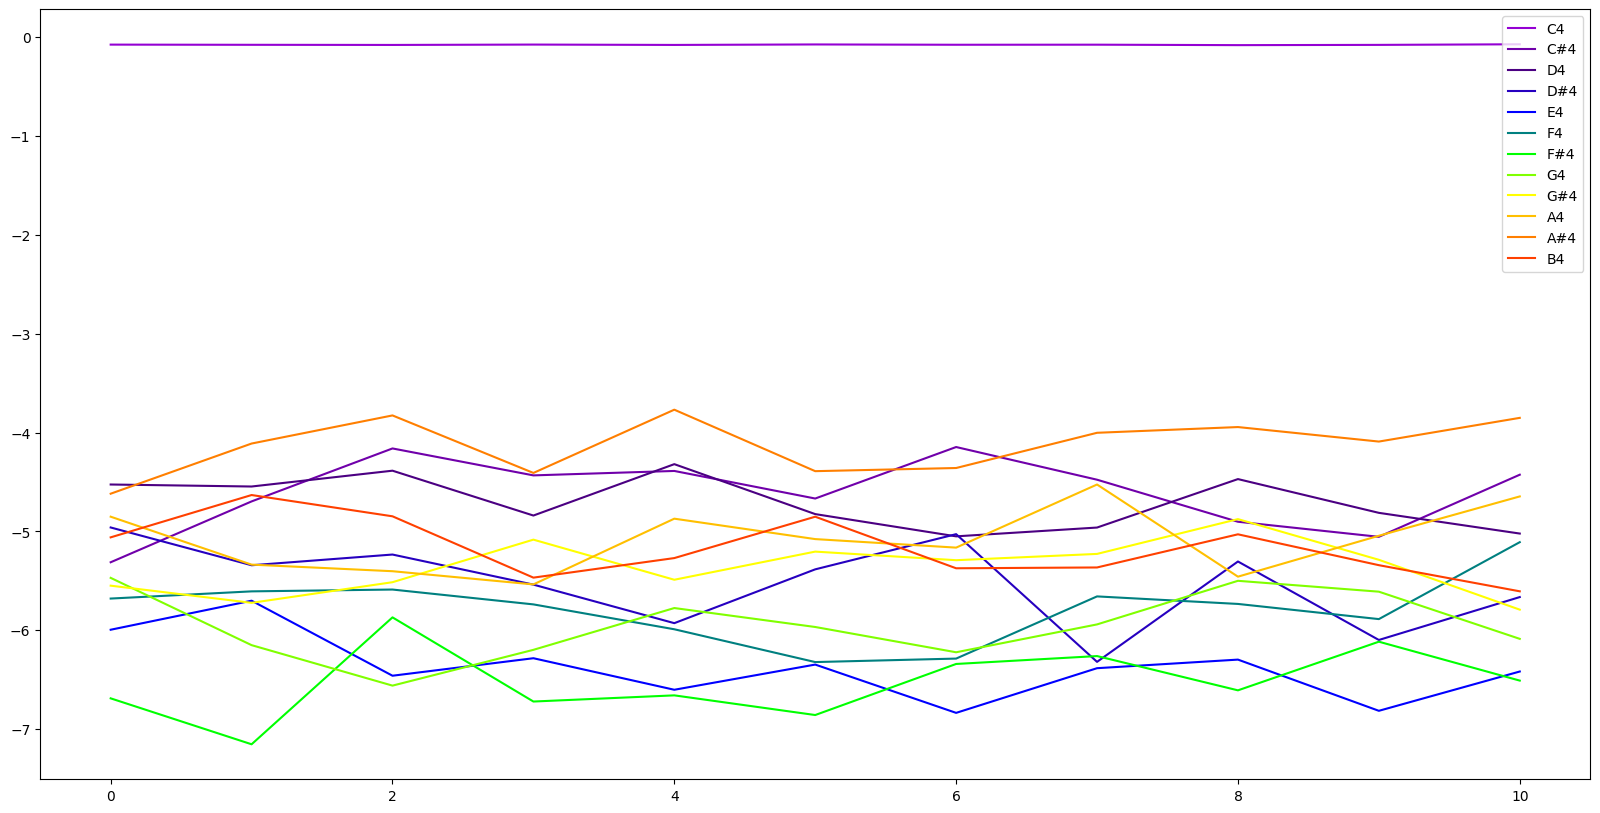

In [26]:
import colorsys

# def get_colors(num_colors):
#     def hsl_to_hex(h, s, l):
#         """Convert HSL color space to HEX color space."""
#         r, g, b = colorsys.hls_to_rgb(h, l, s)
#         return '#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255))

#     # Hue for purple, and constant lightness
#     hue = 0 / 360  # Hue for red
#     lightness = 0.5  # Middle lightness for a balanced color

#     colors = [hsl_to_hex(hue, saturation/100, lightness) for saturation in range(0, 101, 100//(num_colors-1))]
#     return colors

def get_colors(num_colors):
    def interpolate(color1, color2, factor: float):
        """Interpolate between two RGB colors."""
        return [round(c1 + (c2 - c1) * factor) for c1, c2 in zip(color1, color2)]

    def to_hex(color):
        """Convert an RGB color to a hex string."""
        return '#' + ''.join(f'{int(c):02x}' for c in color)

    # Define the key colors of the rainbow
    rainbow_colors = [
        (148, 0, 211),  # Violet
        (75, 0, 130),   # Indigo
        (0, 0, 255),    # Blue
        (0, 255, 0),    # Green
        (255, 255, 0),  # Yellow
        (255, 127, 0),  # Orange
        (255, 0, 0)     # Red
    ]

    # Generate intermediate colors
    colors = []

    for i in range(len(rainbow_colors) - 1):
        start_color = rainbow_colors[i]
        end_color = rainbow_colors[i + 1]
        for j in range(num_colors // (len(rainbow_colors) - 1)):
            factor = j / (num_colors // (len(rainbow_colors) - 1))
            colors.append(to_hex(interpolate(start_color, end_color, factor)))

    # Adjust the list to contain exactly 12 colors
    return colors[:num_colors]



notes = [
    "C4",
    "C#4",
    "D4",
    "D#4",
    "E4",
    "F4",
    "F#4",
    "G4",
    "G#4",
    "A4",
    "A#4",
    "B4",
]
colors = get_colors(12)
plt.figure(figsize=(20, 10))
for note, color in zip(notes, colors):
    plot_snapshot(note, color=color)
plt.legend()
plt.show()